
# ASSIGNED PFR profit

Compound X with concentration of $C_{X0} = 2.5$ kmol / m<sup>3</sup> at a flow rate of 12 m<sup>3</sup>/min is converted to Y in a tubular reactor. The value of Y is \\$1.5/kmol. The cost of operation is $2.50 per minute per m<sup>3</sup>. Find the maximum profit (profit is value of products minus operating costs). The reaction rate is $k C_X^2$, and $k = 1.25$ (m<sup>3</sup>/kmol/min).

Explain in words why there is maximum in profit.




# Solution

The issue here is that we make the most money at high conversion, but the reactor volume grows quickly with high conversion, so the operating costs increase as well. So we expect profit to intially increase, but eventually decrease, leading to a maximum. We solve the maximization problem by finding the minimum of the negative profit.

Profit = value \* Fy(V) - cost \* Volume

We evaluate Fy from the mole balance as a function of volume. First, we simply plot profit as a function of volume to get a good initial guess for the optimization problem. Then we solve the optimization problem.



Approximate maximum profit is $13.03/mol at a reactor volume of 4.592 m^3


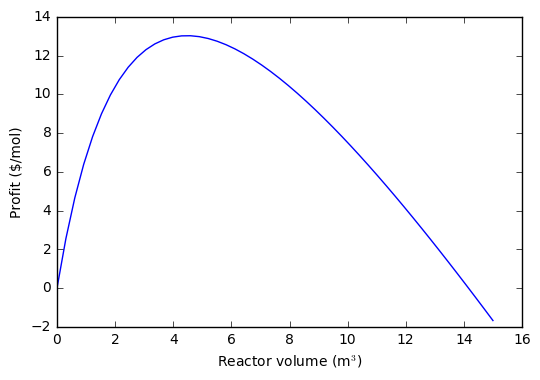

In [2]:
cost = 2.5  # dollar/min/m**3
value = 1.5  # dollar / mol

Cx0 = 2.5  # kmol / m**3
v0 = 12.0  # m**3 / min

k = 1.25  # 1/min


def dFdV(F, V):
    Fx, Fy = F
    Cx = Fx / v0
    r = k * Cx**2
    rx = -r
    ry = r

    dFdX = rx
    dFdY = ry
    return [dFdX, dFdY]

Fx0 = Cx0 * v0
Fy0 = 0

import numpy as np
from scipy.integrate import odeint
Vspan = np.linspace(0, 15)

sol = odeint(dFdV, [Fx0, Fy0], Vspan)

Fy = sol[:, 1]

P = value * Fy - cost * Vspan

imax = np.argmax(P)
print('Approximate maximum profit is ${0:1.2f}/mol '
      'at a reactor volume of {1:1.3f} m^3'.format(P[imax],
                                                   Vspan[imax]))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Vspan, P)
plt.xlabel('Reactor volume (m$^3$)')
plt.ylabel('Profit ($/mol)')

Next we setup a profit function and use fmin to maximize it. The profit function returns the negative of profit, because fmin can only find the minimum value, which is the opposite of the maximum.

In [4]:
def profit(V):
    Vspan = np.linspace(0, V)
    sol = odeint(dFdV, [Fx0, Fy0], Vspan)
    Fy = sol[:, 1][-1]
    P = value * Fy - cost * V
    return -P

from scipy.optimize import fmin
Vopt, = fmin(profit, 4.0)

print('maximum profit is ${0:1.2f}/mol at a '
      'reactor volume of {1:1.3f} m^3'.format(-profit(Vopt),
                                              Vopt))

Optimization terminated successfully.
         Current function value: -13.030781
         Iterations: 13
         Function evaluations: 26
maximum profit is $13.03/mol at a reactor volume of 4.474 m^3
